Import Packages

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [42]:
parent_dir = '../../data/ping_pong/'

NMSG = 5_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}4/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}4/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}4/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}4/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [43]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 10:54:53 2025 +0100) (509.86ms ela...,1.580,0.0396,0.496,2.34,0.38,29.00,51.96 C,Nominal
1,(Wed Mar 26 10:54:54 2025 +0100) (507.97ms ela...,0.546,0.0573,0.467,1.12,0.33,17.99,51.84 C,Nominal
2,(Wed Mar 26 10:54:54 2025 +0100) (509.28ms ela...,0.306,0.0215,0.413,0.81,0.20,13.78,51.84 C,Nominal
3,(Wed Mar 26 10:54:55 2025 +0100) (509.01ms ela...,0.265,0.0299,0.406,0.77,0.17,12.41,51.44 C,Nominal
4,(Wed Mar 26 10:54:55 2025 +0100) (508.41ms ela...,0.264,0.0277,0.411,0.77,0.18,12.69,51.44 C,Nominal


In [44]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(65, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 10:55:05 2025 +0100) (1008.52ms el...,33.9,0.0450,0.711,34.89,3.78,97.76,50.87 C,Nominal
1,(Wed Mar 26 10:55:06 2025 +0100) (1006.24ms el...,33.5,0.0220,0.479,34.34,3.86,99.17,55.38 C,Nominal
2,(Wed Mar 26 10:55:07 2025 +0100) (1004.52ms el...,32.8,0.0329,0.574,33.72,3.75,97.70,58.48 C,Nominal
3,(Wed Mar 26 10:55:08 2025 +0100) (1006.05ms el...,34.2,0.0229,0.597,35.06,3.88,98.34,61.00 C,Nominal
4,(Wed Mar 26 10:55:09 2025 +0100) (1004.55ms el...,33.0,0.0323,0.656,33.93,3.80,99.06,63.12 C,Nominal


In [45]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 10:51:52 2025 +0100) (511.52ms ela...,0.1830,0.0000,0.278,0.28,0.08,5.42,45.22 C,Nominal
1,(Wed Mar 26 10:51:52 2025 +0100) (508.48ms ela...,1.3100,0.0325,0.338,1.53,0.31,23.69,45.22 C,Nominal
2,(Wed Mar 26 10:51:53 2025 +0100) (508.31ms ela...,0.0917,0.0000,0.265,0.14,0.05,3.44,45.29 C,Nominal
3,(Wed Mar 26 10:51:53 2025 +0100) (508.75ms ela...,0.1220,0.0000,0.285,0.19,0.06,3.93,45.29 C,Nominal
4,(Wed Mar 26 10:51:54 2025 +0100) (508.58ms ela...,0.0557,0.0000,0.262,0.10,0.04,2.57,45.29 C,Nominal


In [46]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(36, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 10:52:04 2025 +0100) (1011.25ms el...,12.5,0.00000,0.263,12.95,1.02,99.54,49.59 C,Nominal
1,(Wed Mar 26 10:52:05 2025 +0100) (1007.69ms el...,12.4,0.00000,0.258,12.83,1.01,99.64,52.93 C,Nominal
2,(Wed Mar 26 10:52:06 2025 +0100) (1007.02ms el...,13.2,0.00315,0.327,13.67,1.12,99.14,55.10 C,Nominal
3,(Wed Mar 26 10:52:07 2025 +0100) (1007.44ms el...,17.4,0.04540,0.510,18.08,1.65,98.41,57.55 C,Nominal
4,(Wed Mar 26 10:52:08 2025 +0100) (1007.33ms el...,12.6,0.00000,0.260,13.06,1.01,99.51,59.44 C,Nominal


Clean the Data

In [47]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [48]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [49]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 10:54:53,1.580,0.0396,0.496,2.34,0.38,29.00,51.96,Nominal,509.86
1,2025-03-26 10:54:54,0.546,0.0573,0.467,1.12,0.33,17.99,51.84,Nominal,507.97
2,2025-03-26 10:54:54,0.306,0.0215,0.413,0.81,0.20,13.78,51.84,Nominal,509.28
3,2025-03-26 10:54:55,0.265,0.0299,0.406,0.77,0.17,12.41,51.44,Nominal,509.01
4,2025-03-26 10:54:55,0.264,0.0277,0.411,0.77,0.18,12.69,51.44,Nominal,508.41


In [50]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(65, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 10:55:05,33.9,0.0450,0.711,34.89,3.78,97.76,50.87,Nominal,1008.52
1,2025-03-26 10:55:06,33.5,0.0220,0.479,34.34,3.86,99.17,55.38,Nominal,1006.24
2,2025-03-26 10:55:07,32.8,0.0329,0.574,33.72,3.75,97.70,58.48,Nominal,1004.52
3,2025-03-26 10:55:08,34.2,0.0229,0.597,35.06,3.88,98.34,61.00,Nominal,1006.05
4,2025-03-26 10:55:09,33.0,0.0323,0.656,33.93,3.80,99.06,63.12,Nominal,1004.55


In [51]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 10:51:52,0.1830,0.0000,0.278,0.28,0.08,5.42,45.22,Nominal,511.52
1,2025-03-26 10:51:52,1.3100,0.0325,0.338,1.53,0.31,23.69,45.22,Nominal,508.48
2,2025-03-26 10:51:53,0.0917,0.0000,0.265,0.14,0.05,3.44,45.29,Nominal,508.31
3,2025-03-26 10:51:53,0.1220,0.0000,0.285,0.19,0.06,3.93,45.29,Nominal,508.75
4,2025-03-26 10:51:54,0.0557,0.0000,0.262,0.10,0.04,2.57,45.29,Nominal,508.58


In [52]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(36, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 10:52:04,12.5,0.00000,0.263,12.95,1.02,99.54,49.59,Nominal,1011.25
1,2025-03-26 10:52:05,12.4,0.00000,0.258,12.83,1.01,99.64,52.93,Nominal,1007.69
2,2025-03-26 10:52:06,13.2,0.00315,0.327,13.67,1.12,99.14,55.10,Nominal,1007.02
3,2025-03-26 10:52:07,17.4,0.04540,0.510,18.08,1.65,98.41,57.55,Nominal,1007.44
4,2025-03-26 10:52:08,12.6,0.00000,0.260,13.06,1.01,99.51,59.44,Nominal,1007.33


Visualize the Data

In [53]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


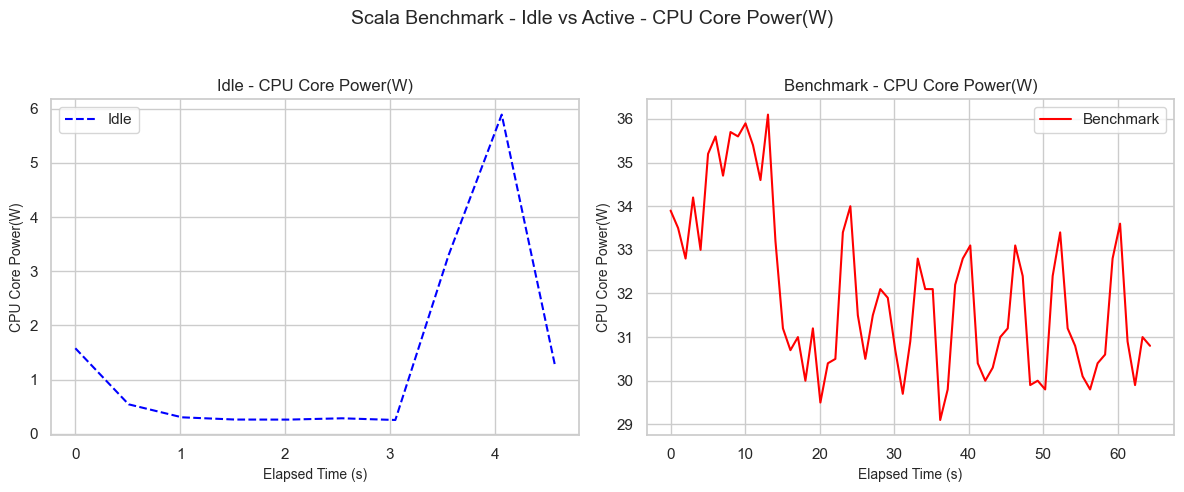

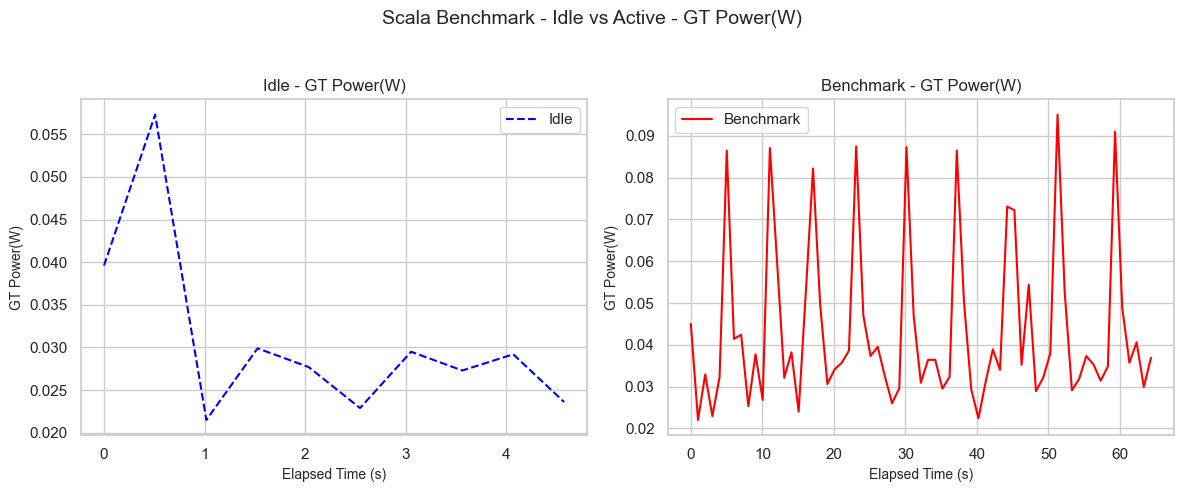

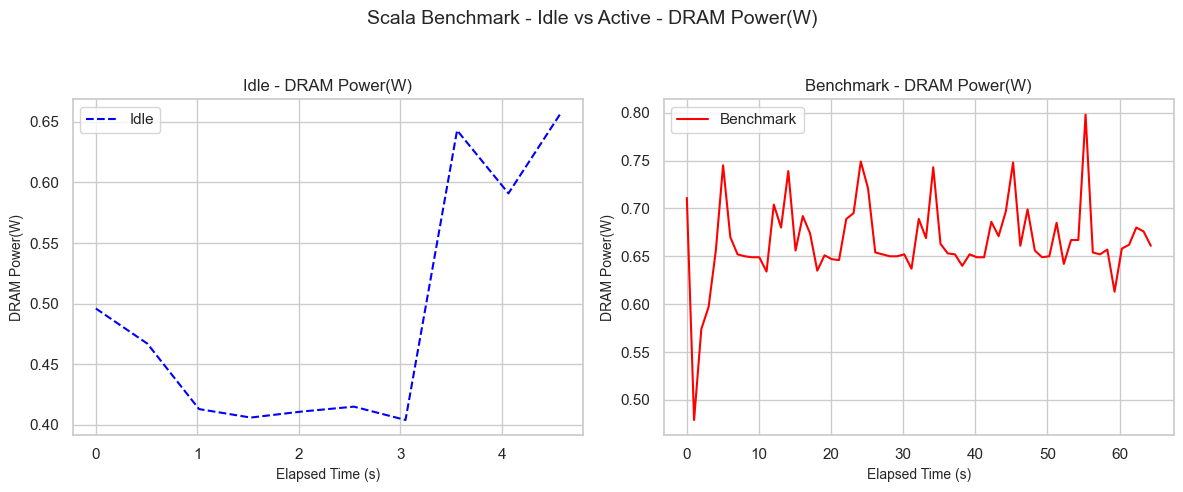

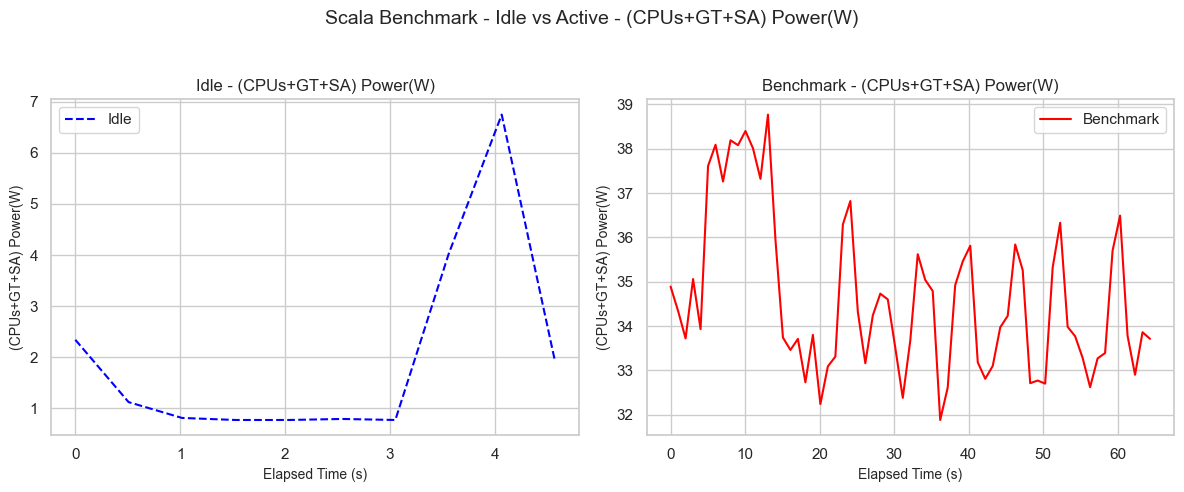

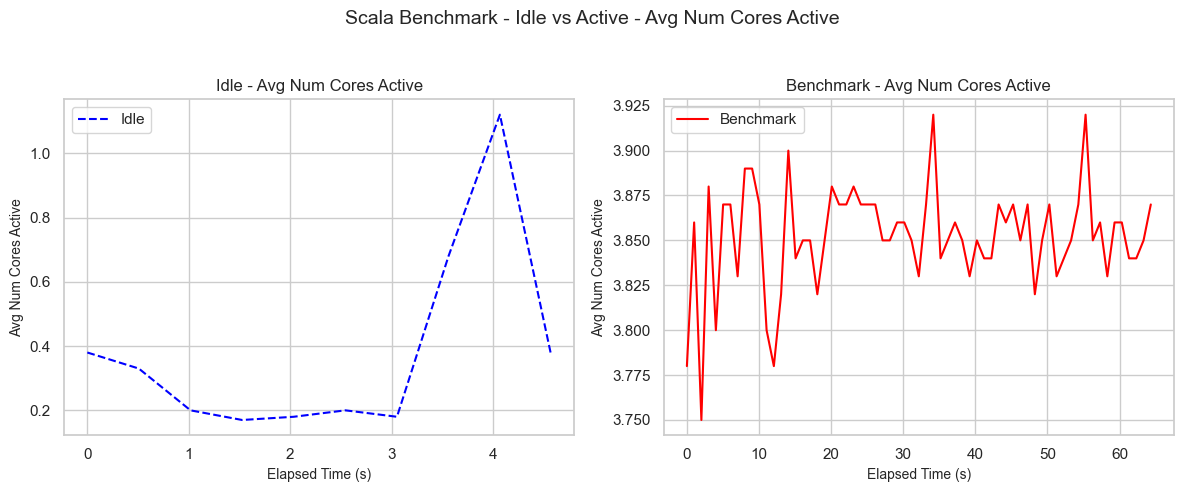

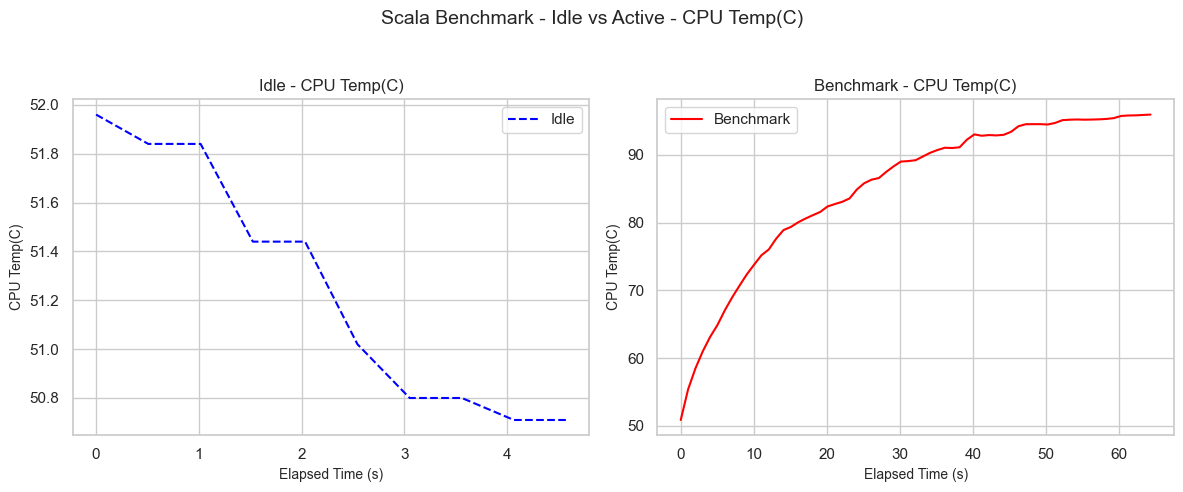

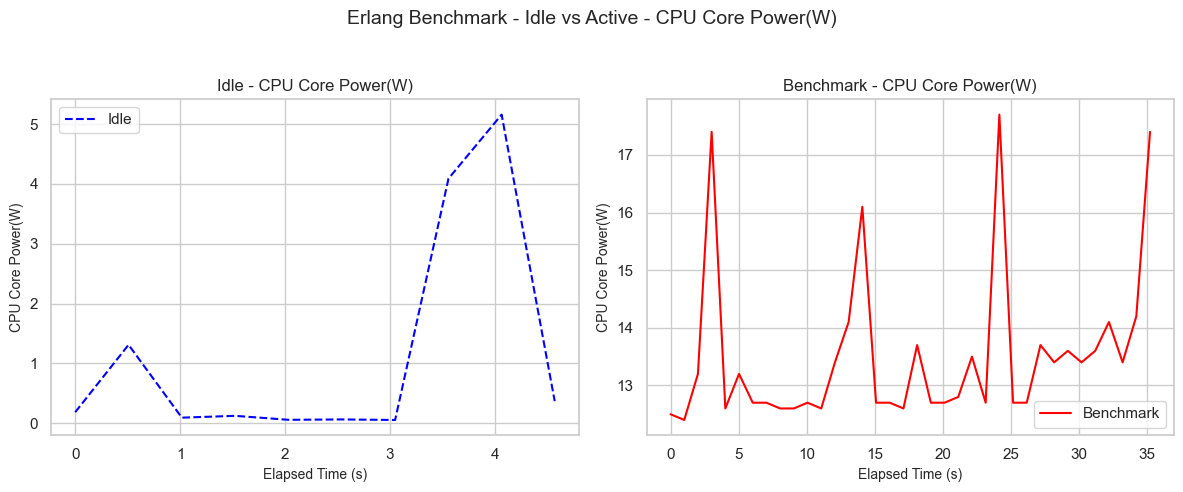

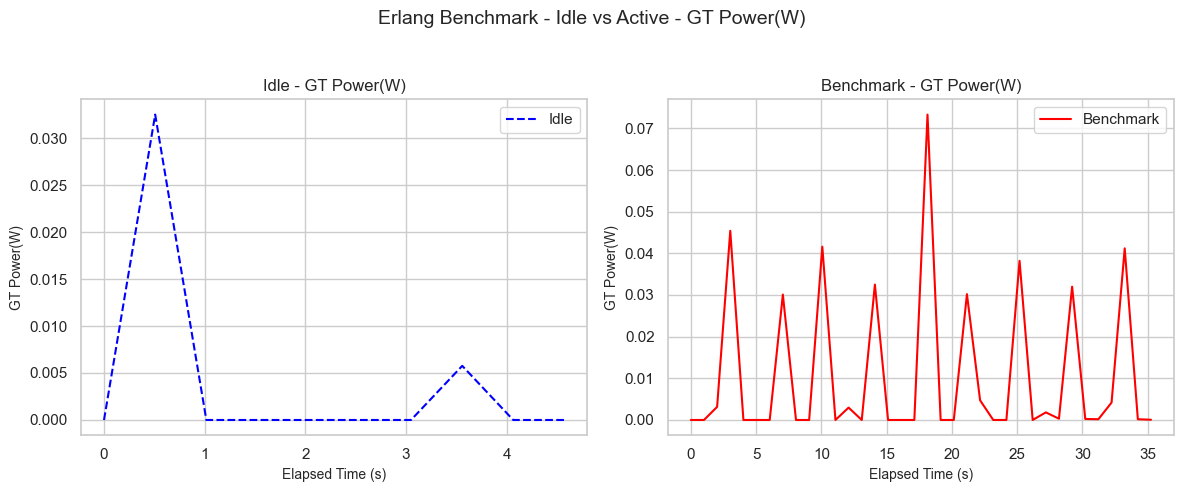

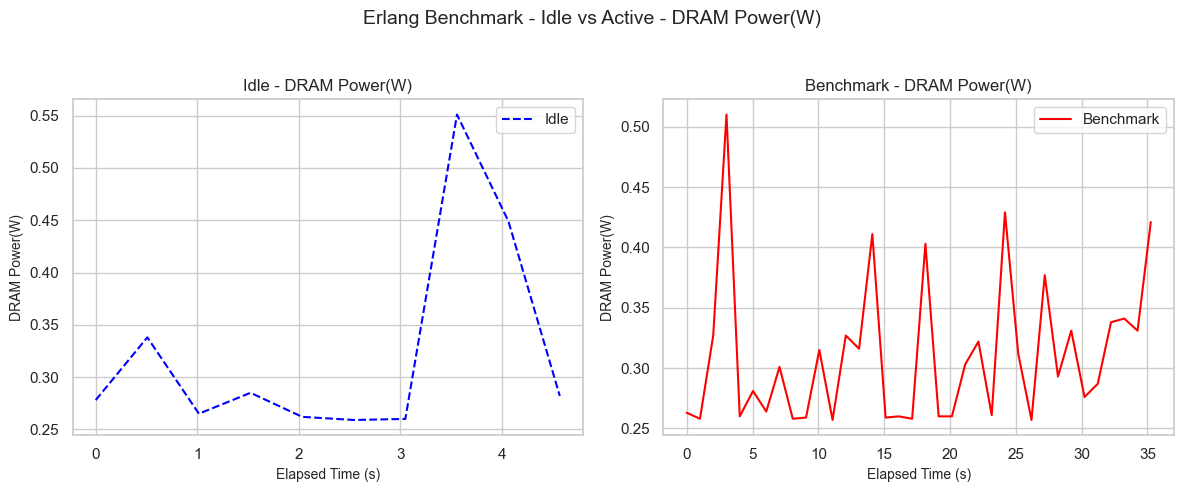

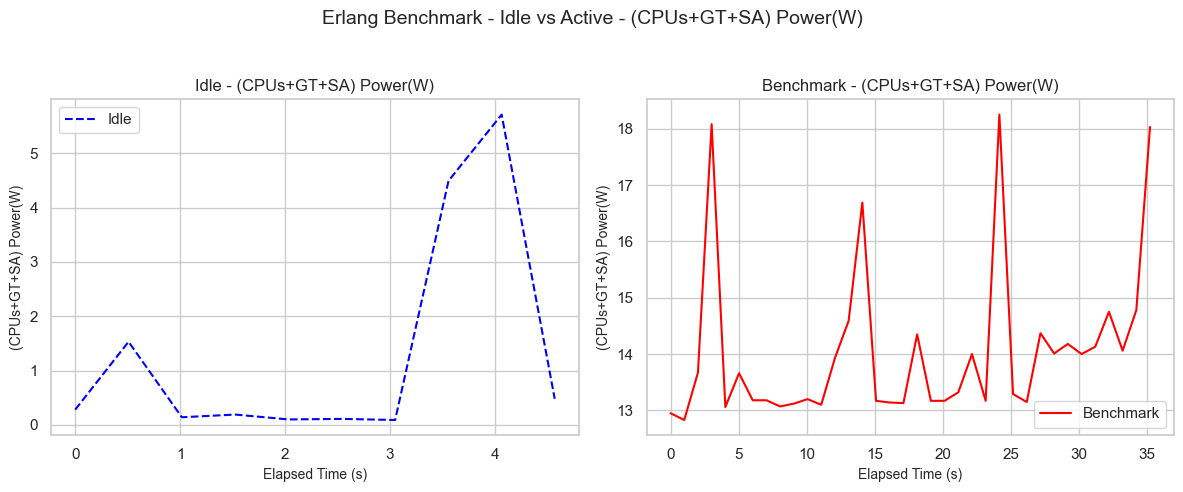

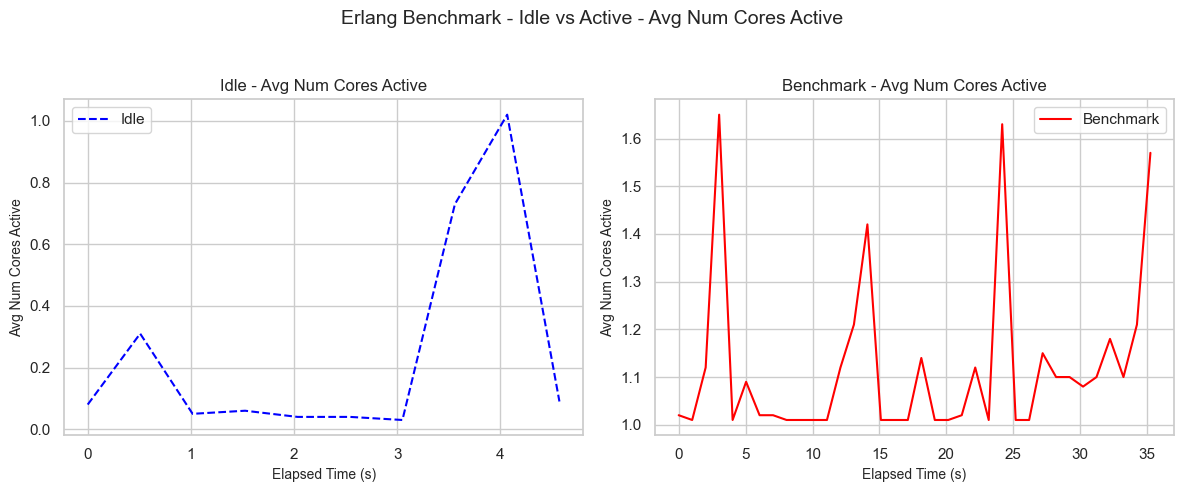

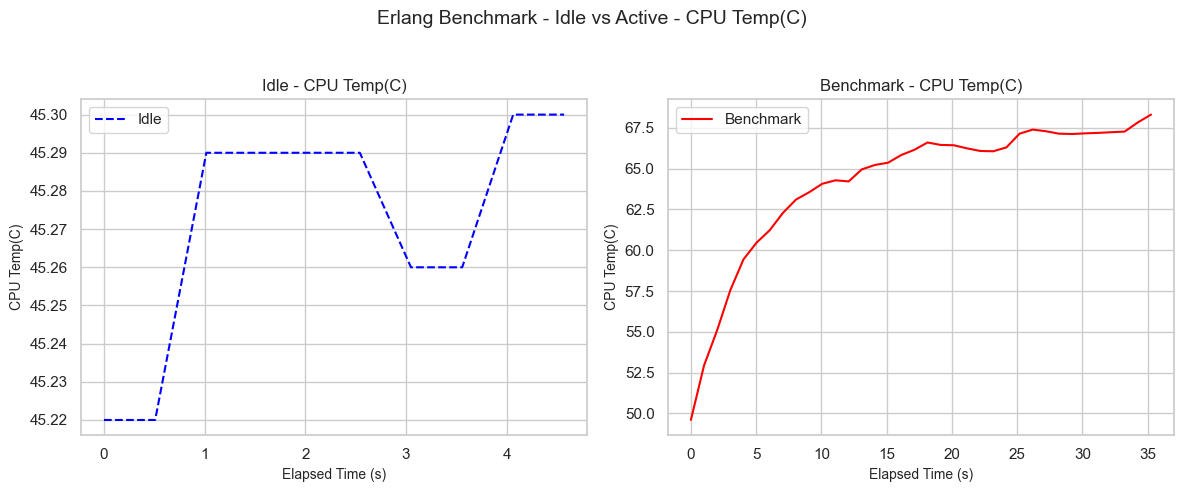

In [54]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [55]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [56]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

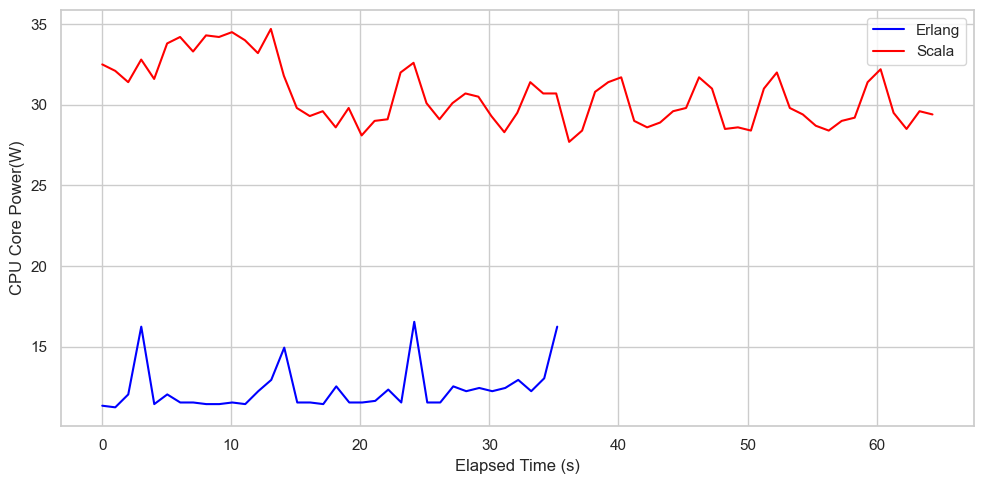

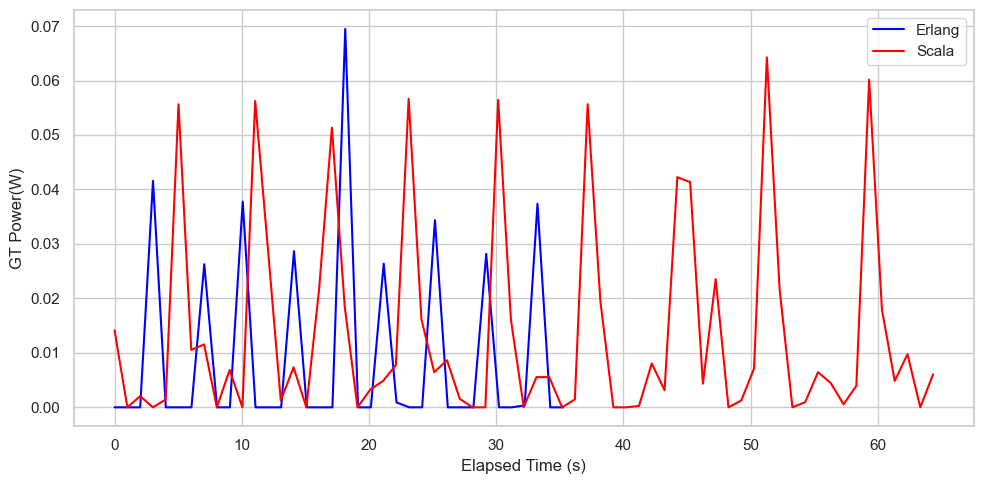

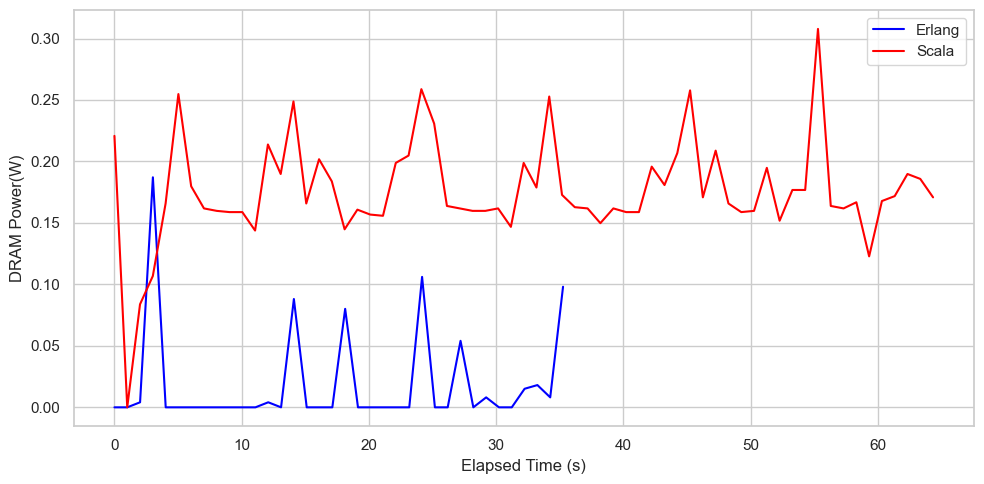

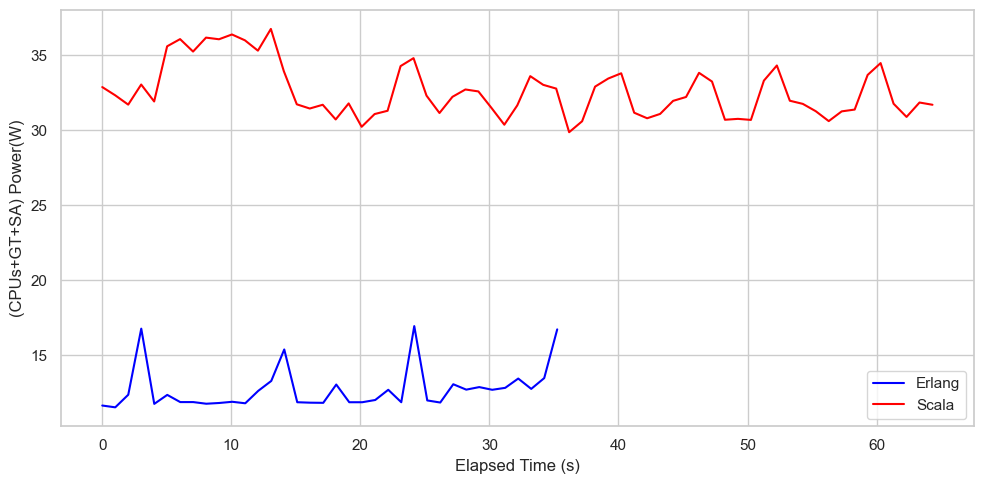

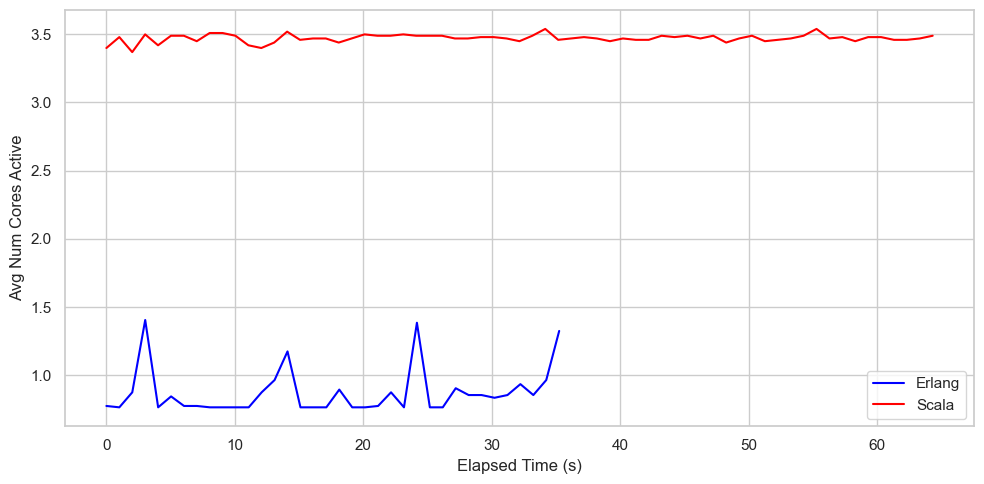

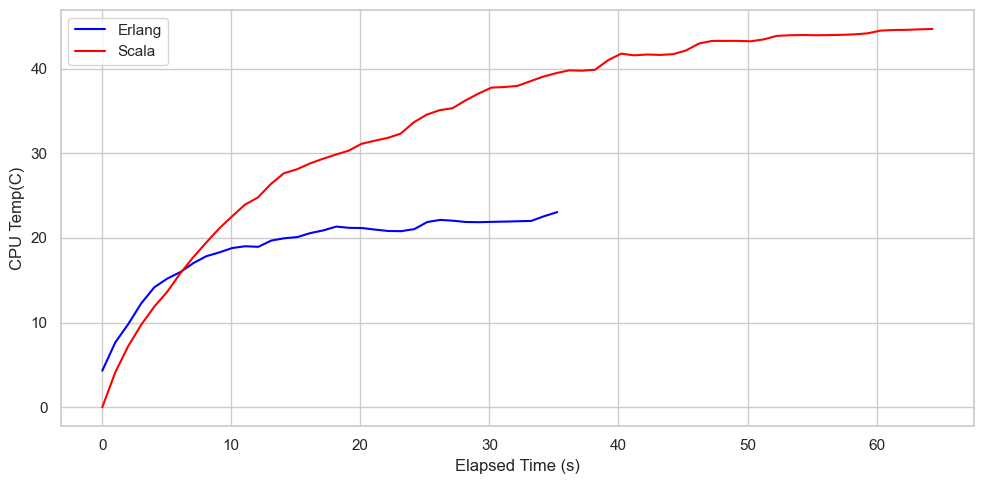

In [57]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [58]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [59]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.600862
GT Power(W)               0.012768
DRAM Power(W)             0.175754
(CPUs+GT+SA) Power(W)    32.615385
CPU Temp(C)              33.932000
Avg Num Cores Active      3.471154
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        12.372692
GT Power(W)               0.006794
DRAM Power(W)            -0.012178
(CPUs+GT+SA) Power(W)    12.741611
CPU Temp(C)              18.917722
Avg Num Cores Active      0.874722
dtype: float64


Compute Total Energy Consumption

In [60]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 2011.0329936492308 Joules
Erlang Benchmark: 448.2674056833778 Joules
